# SVM Baseline Model

In this notebook I will train a simple baseline sentiment classifier on the 
cleaned and balanced dataset (`balanced_reviews.csv`) using TF–IDF 
features and a Linear SVM. 

This provides a reference point before 
trying deep-learning or transformer-based models.

In [14]:
# imports
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

## Loading the cleaned balanced dataset

Here I load the preprocessed and balanced dataset created in `explore_data.ipynb`.  
It contains 120,000 reviews with three sentiment classes (negative, neutral, positive).

In [15]:
#Load data and check it is loading correctly
df = pd.read_csv("../data/balanced_reviews.csv")
df.shape

(120000, 2)

## Train–test split

Splitting the dataset into training and test sets so the SVM model can be 
evaluated on unseen data.

In [16]:
X = df["Text"]
y = df["Sentiment"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

len(X_train), len(X_test)

(96000, 24000)

## TF–IDF vectorisation

This step converts the review text into numerical features using a TF–IDF vectoriser.  
The transformed output is used as input for the SVM classifier.

In [20]:
vectorizer = TfidfVectorizer(
    max_features=50000,
    ngram_range=(1, 2),
    stop_words="english"
)

X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

X_train_tfidf.shape, X_test_tfidf.shape

((96000, 50000), (24000, 50000))

## Logistic Regression


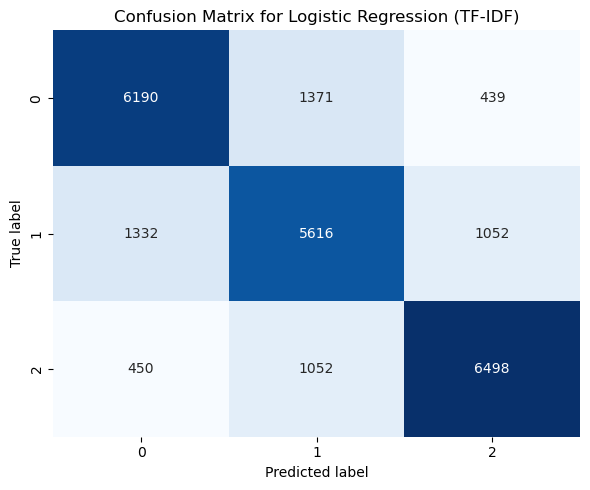

In [21]:
# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot with seaborn
plt.figure(figsize=(6, 5))
sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    cmap="Blues",
    cbar=False
)

plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.title("Confusion Matrix for Logistic Regression (TF-IDF)")

plt.tight_layout()
plt.show()